In [1]:
#opening the file 
import pandas as pd
# Reading a .csv file and storing it in a DataFrame
df = pd.read_csv('BTC_1.csv')
# Display the basic details of the dataset

print(df.describe())
print("\nFirst few rows of the dataset:")
print(df.head())
print("Number of rows and columns:", df.shape)
print("\nColumn names:")
print(df.columns)




               Open          High           Low         Close     Adj Close  \
count   3463.000000   3463.000000   3463.000000   3463.000000   3463.000000   
mean   15261.979209  15618.983150  14885.110881  15280.056662  15280.056662   
std    16766.859511  17171.378300  16332.988531  16785.731099  16785.731099   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      974.570007   1002.589996    950.290008    974.869507    974.869507   
50%     8504.410156   8691.540039   8244.540039   8510.379883   8510.379883   
75%    26147.213868  26522.880860  25803.703125  26175.978515  26175.978515   
max    69025.921875  70083.054688  68053.125000  68498.882813  68498.882813   

             Volume  
count  3.463000e+03  
mean   1.683662e+10  
std    1.915551e+10  
min    5.914570e+06  
25%    1.871715e+08  
50%    1.228464e+10  
75%    2.717756e+10  
max    3.509679e+11  

First few rows of the dataset:
         Date        Open        High         Low       Cl

In [2]:

import matplotlib.pyplot as plt

In [3]:
# Display the first few rows of the dataframe
print(df.head())

# Check the data types and missing values
print(df.info())

         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

       Volume  
0  21056800.0  
1  34483200.0  
2  37919700.0  
3  36863600.0  
4  26580100.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3464 non-null   object 
 1   Open       3463 non-null   float64
 2   High       3463 non-null   float64
 3   Low        3463 non-null   float64
 4   Close      3463 non-null   float64
 5   Adj Close  3463 non-null   float64
 6   Volume    

In [4]:
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Forward fill missing values
df.fillna(method='ffill', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3464 entries, 2014-09-17 to 2024-03-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3464 non-null   float64
 1   High       3464 non-null   float64
 2   Low        3464 non-null   float64
 3   Close      3464 non-null   float64
 4   Adj Close  3464 non-null   float64
 5   Volume     3464 non-null   float64
dtypes: float64(6)
memory usage: 189.4 KB


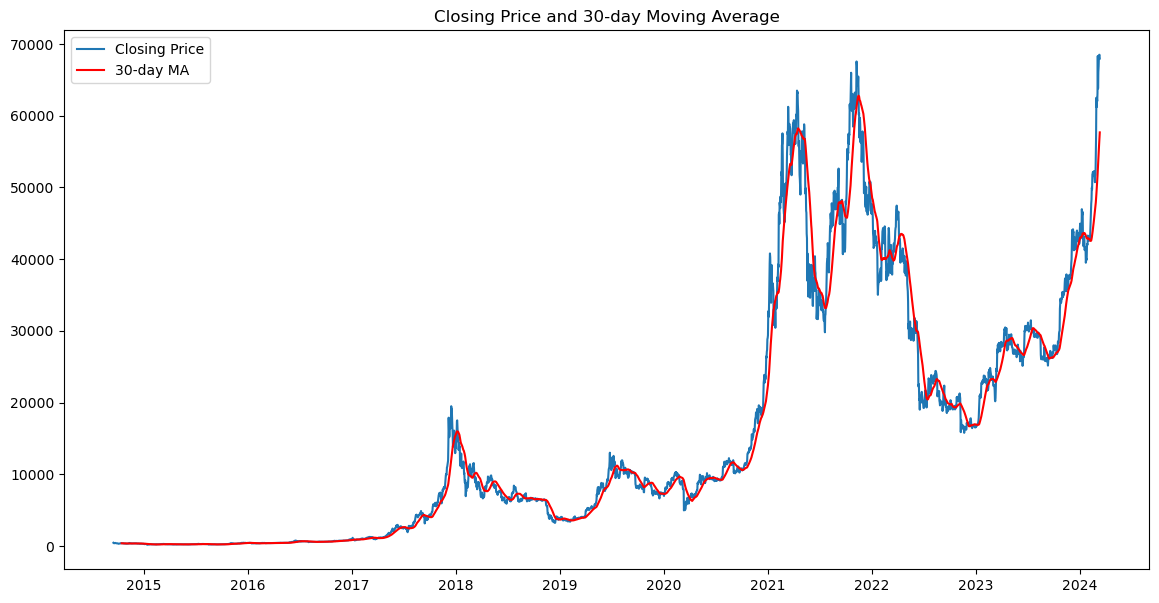

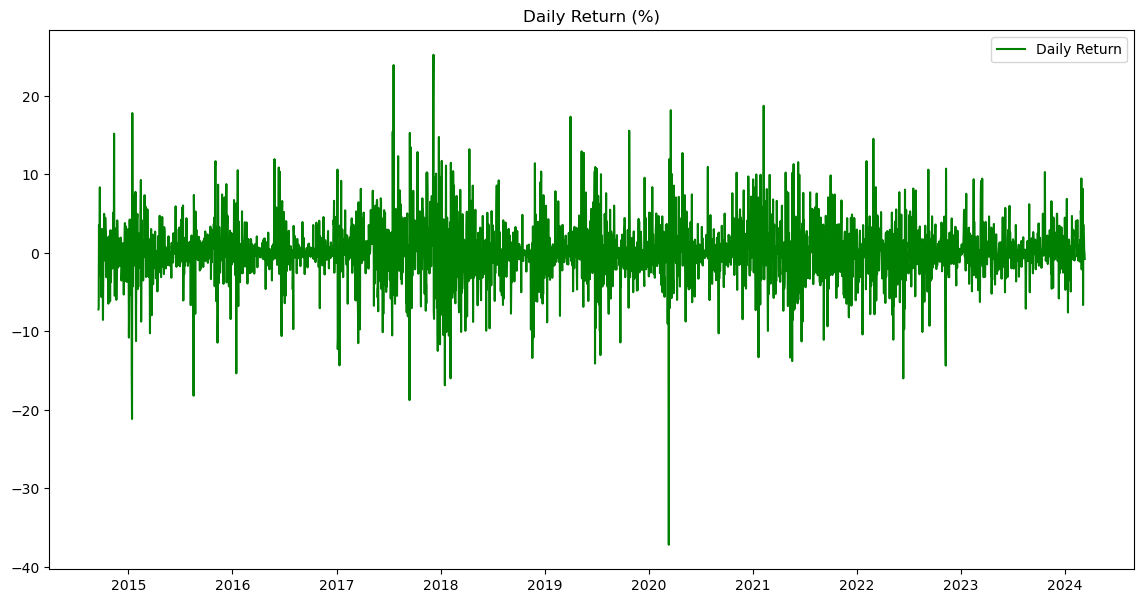

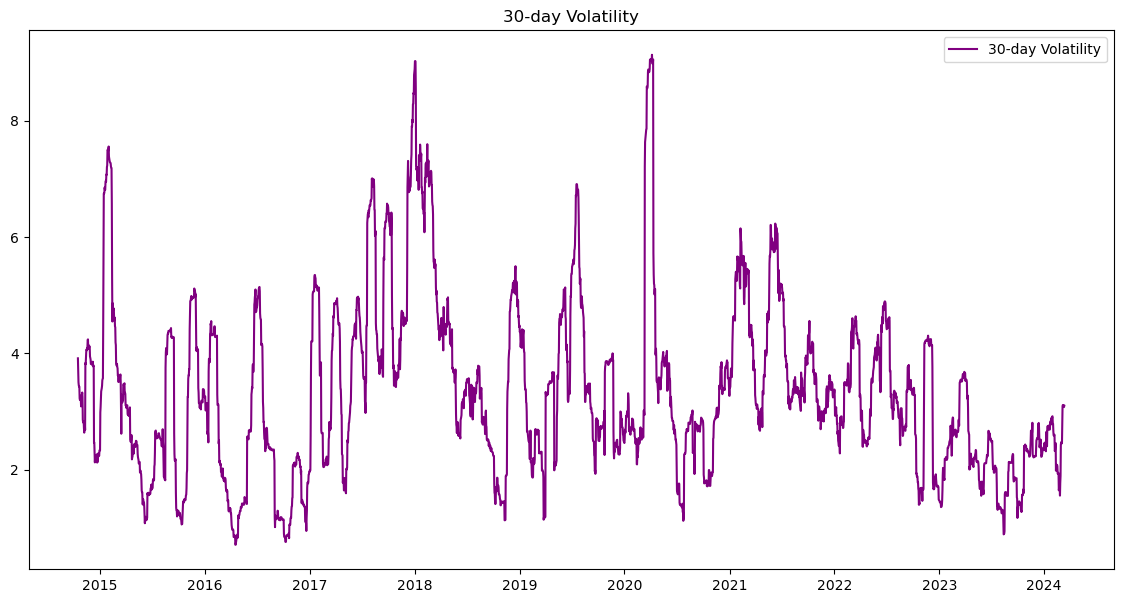

In [6]:
import matplotlib.pyplot as plt

# Calculate daily returns as percentage
df['Daily Return'] = df['Adj Close'].pct_change() * 100

# Calculate the 30-day moving average of the closing price
df['30-day MA'] = df['Close'].rolling(window=30).mean()

# Calculate the 30-day volatility (standard deviation of daily returns)
df['30-day Volatility'] = df['Daily Return'].rolling(window=30).std()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['30-day MA'], label='30-day MA', color='red')
plt.title('Closing Price and 30-day Moving Average')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['Daily Return'], label='Daily Return', color='green')
plt.title('Daily Return (%)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['30-day Volatility'], label='30-day Volatility', color='purple')
plt.title('30-day Volatility')
plt.legend()
plt.show()


In [7]:
# Calculate the index for the split
split_idx = int(len(df) * 0.8)

# Divide the data into training and testing sets
train = df['Adj Close'][:split_idx]  # First 80% of data
test = df['Adj Close'][split_idx:]   # Last 20% of data


In [8]:
print(f"Training set size: {len(train)}, Testing set size: {len(test)}")

Training set size: 2771, Testing set size: 693


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [10]:
#  ARIMA model, adjusting p, d, q 
model = ARIMA(train, order=(1, 1, 1))  # (p, d, q) are hyperparameters
fitted_model = model.fit()


/Users/adharshvelen/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/adharshvelen/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/adharshvelen/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [11]:
# Output the fit summary
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2771
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -22420.343
Date:                Tue, 07 May 2024   AIC                          44846.687
Time:                        22:54:53   BIC                          44864.467
Sample:                    09-17-2014   HQIC                         44853.108
                         - 04-18-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0635      0.366      0.173      0.863      -0.655       0.782
ma.L1         -0.0874      0.366     -0.239      0.811      -0.805       0.630
sigma2      6.288e+05   5401.926    116.400      0.0

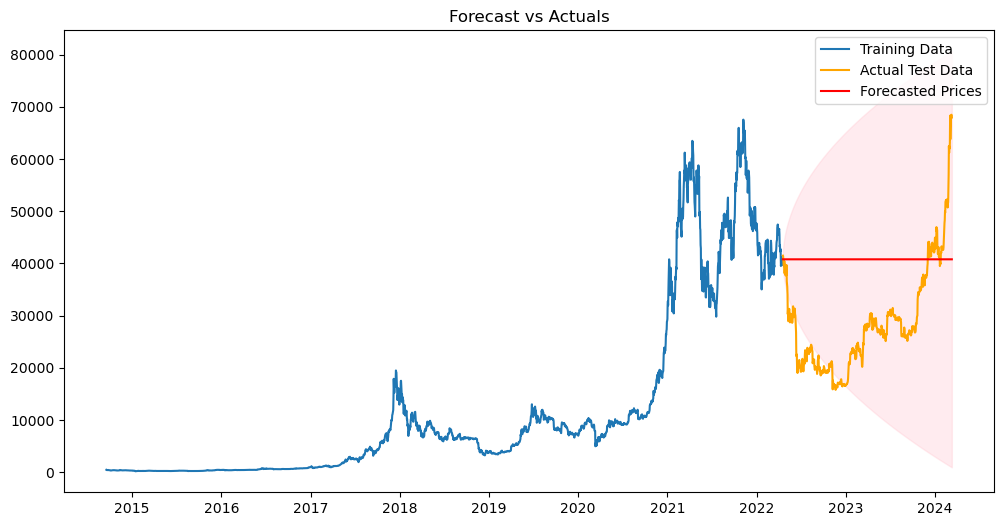

In [12]:
# Forecast the next steps equivalent to the test set size
forecast = fitted_model.get_forecast(steps=len(test))
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Ploting the forecast against the actual values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data', color='orange')
plt.plot(test.index, mean_forecast, label='Forecasted Prices', color='red')
# Correcting the confidence interval plotting
plt.fill_between(test.index, confidence_intervals['lower Adj Close'], confidence_intervals['upper Adj Close'], color='pink', alpha=0.3)
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()


In [13]:
# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test, mean_forecast))
mae = mean_absolute_error(test, mean_forecast)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Akaike Information Criterion (AIC): {fitted_model.aic}')


Root Mean Squared Error: 15661.193002542055
Mean Absolute Error: 14096.048046884362
Akaike Information Criterion (AIC): 44846.686706959495


In [14]:
#cal MAPE 
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test, mean_forecast)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 60.59%


In [15]:
# Calculate R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(test, mean_forecast)
print(f'R-squared: {r_squared:.2f}')


R-squared: -1.52


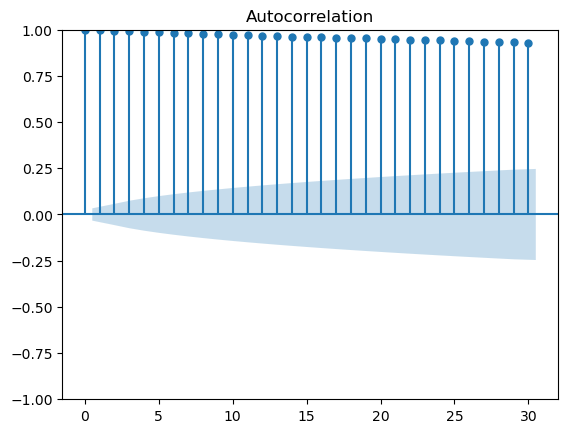

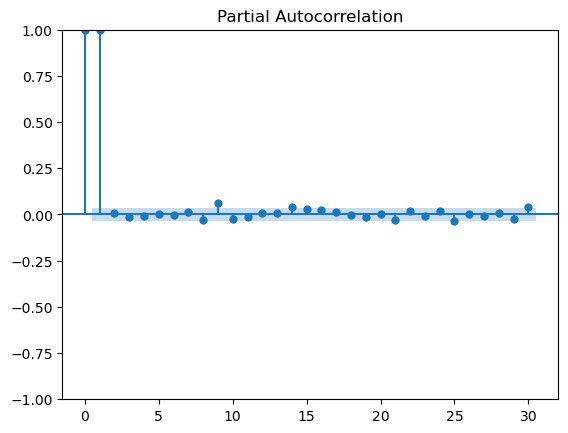

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ploting ACF and PACF
plot_acf(df['Adj Close'], lags=30)
plot_pacf(df['Adj Close'], lags=30)
plt.show()


In [17]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Prepare the data
df['Adj Close'] = df['Adj Close'].astype(float)
train = df['Adj Close'][:int(len(df)*0.8)]
test = df['Adj Close'][int(len(df)*0.8):]

# Define the p, d, and q ranges
p = range(0, 4)  # typically 0-3 here
d = range(0, 3)  # typically 0-2 here
q = range(0, 4)  # typically 0-3 here

best_score, best_cfg = float("inf"), None

# Grid search
for i in p:
    for j in d:
        for k in q:
            order = (i, j, k)
            try:
                model = ARIMA(train, order=order)
                model_fit = model.fit()
                forecast = model_fit.forecast(steps=len(test))
                error = mean_squared_error(test, forecast)
                if error < best_score:
                    best_score, best_cfg = error, order
                print('ARIMA%s MSE=%.3f' % (order,error))
            except:
                continue

print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


ARIMA(0, 0, 0) MSE=375460180.406
ARIMA(0, 0, 1) MSE=374591672.422
ARIMA(0, 0, 2) MSE=373624607.201
ARIMA(0, 0, 3) MSE=372609045.187
ARIMA(0, 1, 0) MSE=245925363.483
ARIMA(0, 1, 1) MSE=245286804.948
ARIMA(0, 1, 2) MSE=245259859.860
ARIMA(0, 1, 3) MSE=245320678.060
ARIMA(0, 2, 0) MSE=204155750690.221
ARIMA(0, 2, 1) MSE=376090804.233
ARIMA(0, 2, 2) MSE=365400080.880
ARIMA(0, 2, 3) MSE=365080785.306
ARIMA(1, 0, 0) MSE=185088734.095
ARIMA(1, 0, 1) MSE=186472136.332
ARIMA(1, 0, 2) MSE=186786081.890
ARIMA(1, 0, 3) MSE=185592424.135
ARIMA(1, 1, 0) MSE=245297110.015
ARIMA(1, 1, 1) MSE=245272966.263
ARIMA(1, 1, 2) MSE=237521214.137
ARIMA(1, 1, 3) MSE=245500311.804
ARIMA(1, 2, 0) MSE=42551125097.514
ARIMA(1, 2, 1) MSE=365140398.105
ARIMA(1, 2, 2) MSE=366134920.163
ARIMA(1, 2, 3) MSE=365121253.555
ARIMA(2, 0, 0) MSE=186450233.398
ARIMA(2, 0, 1) MSE=186830520.926
ARIMA(2, 0, 2) MSE=180977774.961
ARIMA(2, 0, 3) MSE=180710037.577
ARIMA(2, 1, 0) MSE=245250226.654
ARIMA(2, 1, 1) MSE=245252635.545
ARIMA

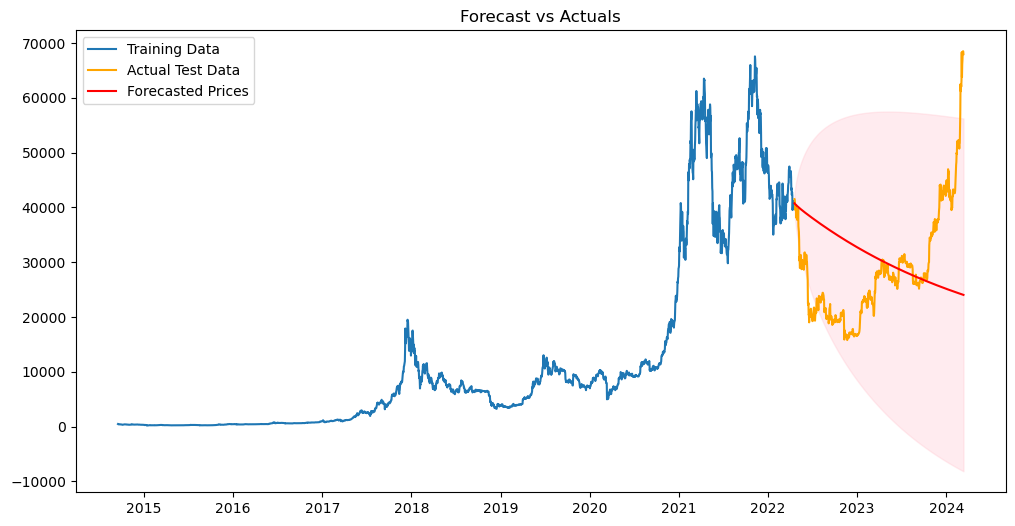

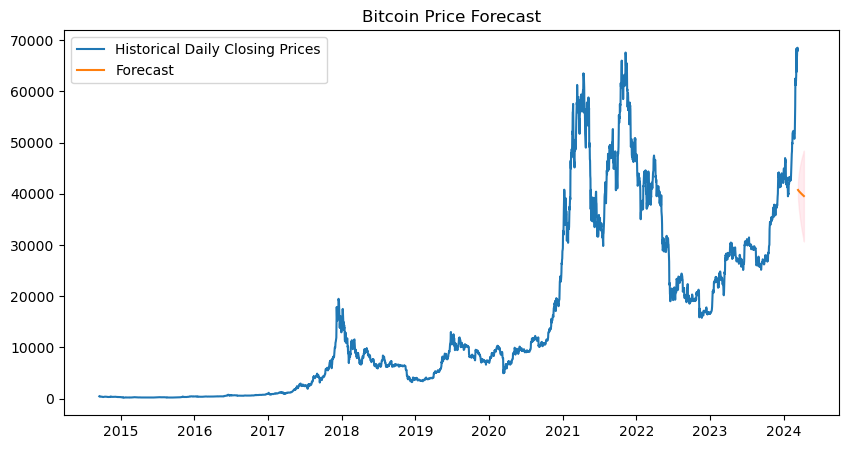

In [18]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
split_idx = int(len(df) * 0.8)
train = df['Adj Close'][:split_idx]
test = df['Adj Close'][split_idx:]

# Model fitting
model = ARIMA(train, order=(2,0,3))
fitted_model = model.fit()

# In-sample forecast
forecast = fitted_model.get_forecast(steps=len(test))
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotting the in-sample forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data', color='orange')
plt.plot(test.index, mean_forecast, label='Forecasted Prices', color='red')
plt.fill_between(test.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

# Out-of-sample forecasting
forecast_out = fitted_model.get_forecast(steps=30)
mean_forecast_out = forecast_out.predicted_mean
confidence_intervals_out = forecast_out.conf_int()

# Future dates handling, adjusted for non-trading days if necessary
future_dates = [df['Adj Close'].index[-1] + pd.Timedelta(days=i) for i in range(1, 31)]

# Plotting future forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Adj Close'].index, df['Adj Close'], label='Historical Daily Closing Prices')
plt.plot(future_dates, mean_forecast_out, label='Forecast')
plt.fill_between(future_dates, confidence_intervals_out.iloc[:, 0], confidence_intervals_out.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Bitcoin Price Forecast')
plt.legend()
plt.show()



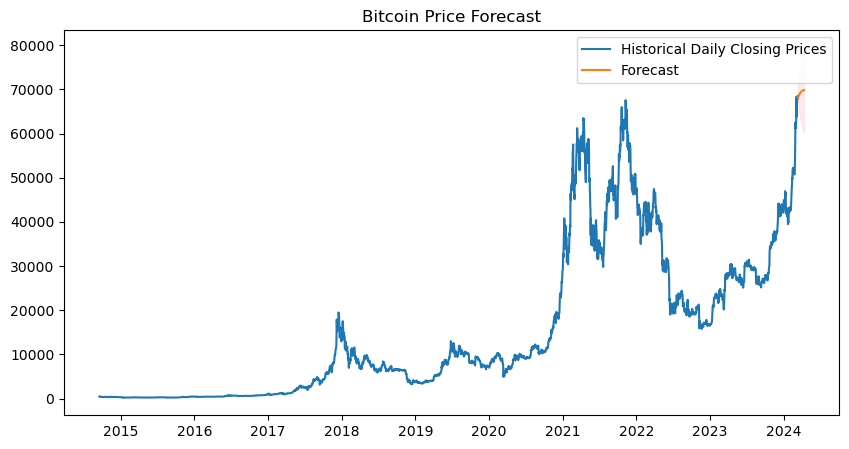

In [19]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fiting the best ARIMA model
model = ARIMA(df['Adj Close'], order=(2,0,3))
fitted_model = model.fit()

# Forecasting
forecast = fitted_model.get_forecast(steps=30)  # Adjust steps as needed
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Ploting
plt.figure(figsize=(10, 5))
plt.plot(df['Adj Close'].index, df['Adj Close'], label='Historical Daily Closing Prices')
future_dates = [df['Adj Close'].index[-1] + pd.Timedelta(days=i) for i in range(1, 31)]
plt.plot(future_dates, mean_forecast, label='Forecast')
plt.fill_between(future_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Bitcoin Price Forecast')
plt.legend()
plt.show()


In [20]:
# Check lengths
print(len(test))           #  shows the length of test data
print(len(mean_forecast))  #  shows the length of  forecast

# adjusting the number of forecast steps to you generate forecast
forecast = fitted_model.get_forecast(steps=len(test))  # Use the correct number of steps
mean_forecast = forecast.predicted_mean


693
30


In [21]:
# 'fitted_model' is the ARIMA model that has been fitted to the training data
forecast = fitted_model.get_forecast(steps=len(test))  
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, mean_forecast))

# Calculate MAE
mae = mean_absolute_error(test, mean_forecast)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test, mean_forecast)

# Calculate R-squared
r_squared = r2_score(test, mean_forecast)

# Retrieve AIC from the model
aic = fitted_model.aic

# Print the results
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'R-squared: {r_squared}')
print(f'AIC: {aic}')


RMSE: 30057.18708064454
MAE: 26455.407232054196
MAPE: 114.19130042120366%
R-squared: -8.282178492943427
AIC: 56182.47609125238


In [23]:
#intalling arch 
!pip install arch

In [24]:
import pandas as pd

#  'Adj Close' is  column with daily closing prices
df['Returns'] = df['Adj Close'].pct_change().dropna() * 100  # convert to percentage


In [25]:
# Check for NaNs or infinite values in your returns series
print(df['Returns'].isna().sum())  # Check for NaNs
print(np.isinf(df['Returns']).sum())  # Check for infinite values

# Option 1: Drop NaNs and infinite values
df = df[np.isfinite(df['Returns'])]  # This removes any rows where 'Returns' is NaN or infinite


1
0


In [26]:
from arch import arch_model

# using model(1,1)here;
model = arch_model(df['Returns'], mean='Zero', vol='GARCH', p=1, q=1)
model_fit = model.fit(disp='off')  # 'disp' controls the verbosity during fitting

# Display the model summary
print(model_fit.summary())


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -9135.52
Distribution:                  Normal   AIC:                           18277.0
Method:            Maximum Likelihood   BIC:                           18295.5
                                        No. Observations:                 3463
Date:                Tue, May 07 2024   Df Residuals:                     3463
Time:                        22:55:15   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.6099      0.200      3.055  2.251e-03   [  0.21

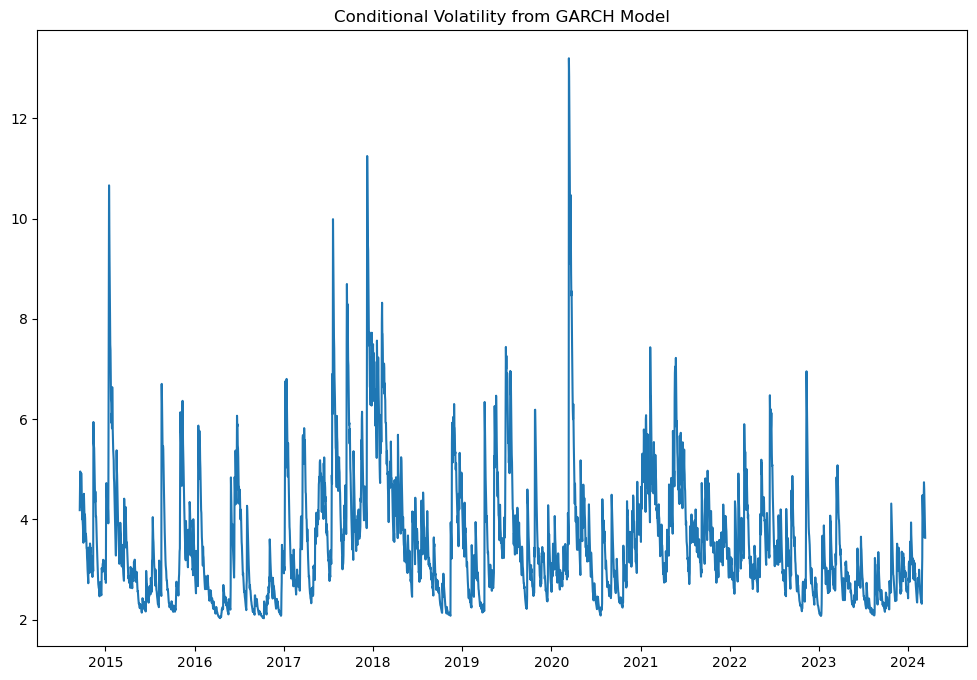

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(model_fit.conditional_volatility)
ax.set_title('Conditional Volatility from GARCH Model')
plt.show()


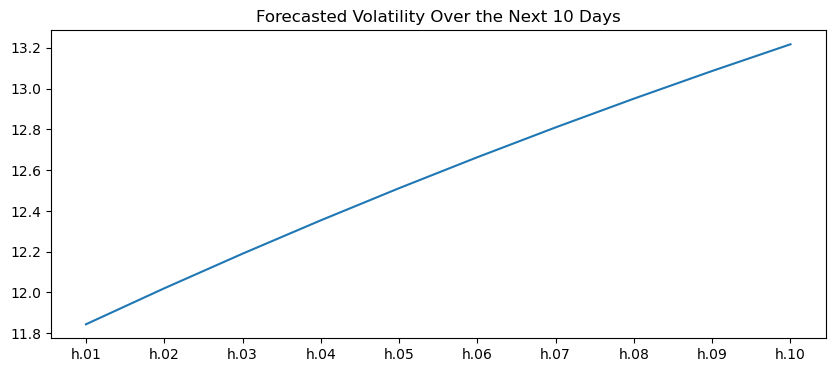

In [28]:
# Forecast the next 10 days
forecasts = model_fit.forecast(horizon=10)

# Plot the forecasted volatility
plt.figure(figsize=(10, 4))
plt.plot(forecasts.variance.iloc[-1])
plt.title('Forecasted Volatility Over the Next 10 Days')
plt.show()


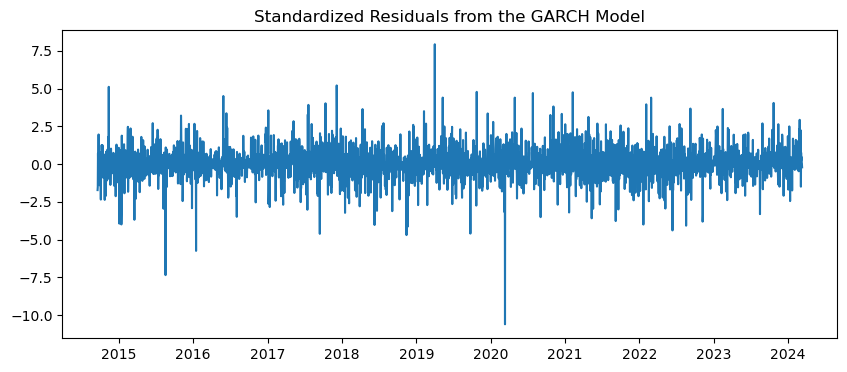

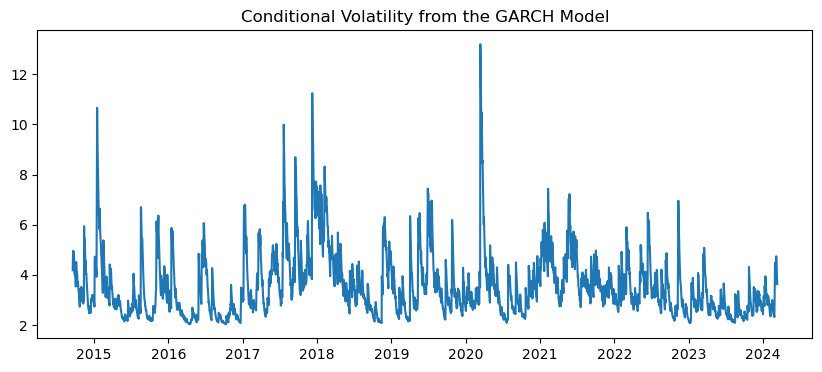

In [29]:
import matplotlib.pyplot as plt

# Plot the standardized residuals
plt.figure(figsize=(10, 4))
plt.plot(model_fit.std_resid)
plt.title('Standardized Residuals from the GARCH Model')
plt.show()

# Plot the conditional volatility
plt.figure(figsize=(10, 4))
plt.plot(model_fit.conditional_volatility)
plt.title('Conditional Volatility from the GARCH Model')
plt.show()


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -9132.99
Distribution:                  Normal   AIC:                           18274.0
Method:            Maximum Likelihood   BIC:                           18298.6
                                        No. Observations:                 3463
Date:                Tue, May 07 2024   Df Residuals:                     3463
Time:                        22:55:15   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7252      0.236      3.076  2.095e-03    [  

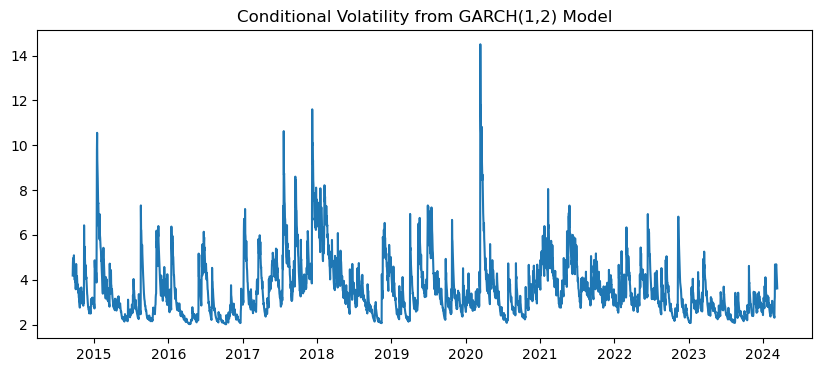

In [30]:
from arch import arch_model

# Fit a GARCH(1,2) model
garch_1_2 = arch_model(df['Returns'], mean='Zero', vol='GARCH', p=1, q=2)
garch_1_2_fit = garch_1_2.fit(disp='off')

# Print the summary of the model
print(garch_1_2_fit.summary())

# Plot the conditional volatility
plt.figure(figsize=(10, 4))
plt.plot(garch_1_2_fit.conditional_volatility)
plt.title('Conditional Volatility from GARCH(1,2) Model')
plt.show()


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -9135.52
Distribution:                  Normal   AIC:                           18279.0
Method:            Maximum Likelihood   BIC:                           18303.6
                                        No. Observations:                 3463
Date:                Tue, May 07 2024   Df Residuals:                     3463
Time:                        22:55:15   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.6099      0.278      2.197  2.803e-02 [6.577e-0

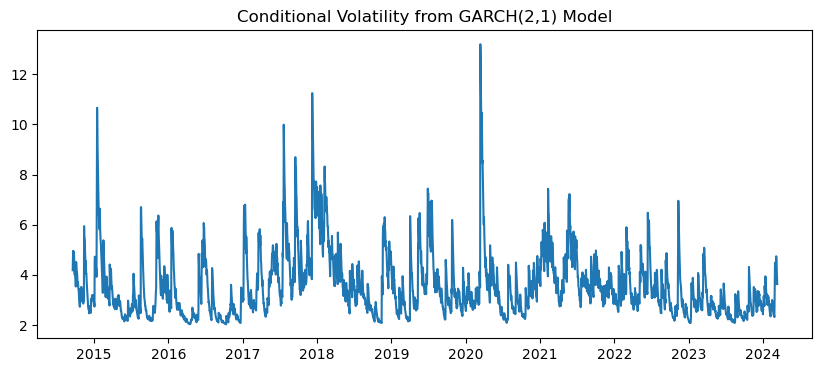

In [31]:
from arch import arch_model

# Fit a GARCH(2,1) model
garch_2_1 = arch_model(df['Returns'], mean='Zero', vol='GARCH', p=2, q=1)
garch_2_1_fit = garch_2_1.fit(disp='off')

# Print the summary of the model
print(garch_2_1_fit.summary())

# Plot the conditional volatility
plt.figure(figsize=(10, 4))
plt.plot(garch_2_1_fit.conditional_volatility)
plt.title('Conditional Volatility from GARCH(2,1) Model')
plt.show()


In [32]:
# Based on the summary GARCH(2,1) model performs the best here;



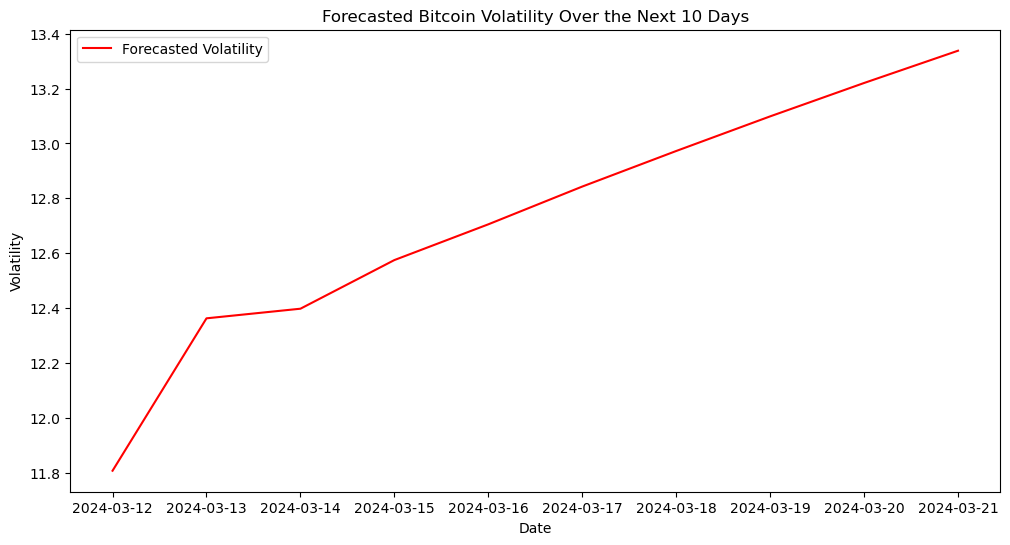

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Adjusting the 'start' parameter as needed; this assumes the last date in index needs to be included
future_dates = pd.date_range(start=df.index[-1], periods=11, freq='D')

# The forecasts output often starts from the day after the last historical point
future_dates = future_dates[1:]  # Adjusting to exclude the overlap if needed

# for 'garch_1_2_fit' GARCH(1,2) model
forecasts = garch_1_2_fit.forecast(horizon=10)
predicted_volatility = forecasts.variance.iloc[-1].values

# Plotting the forecasted volatility
plt.figure(figsize=(12, 6))
plt.plot(future_dates, predicted_volatility, color='red', label='Forecasted Volatility')
plt.title('Forecasted Bitcoin Volatility Over the Next 10 Days')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()
